# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [116]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [117]:
# Your work here.

import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline
from scipy import stats
import seaborn as sns


In [118]:
# Get initial insight of data 

df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


### 1 - Is the distribution of body temperatures normal?

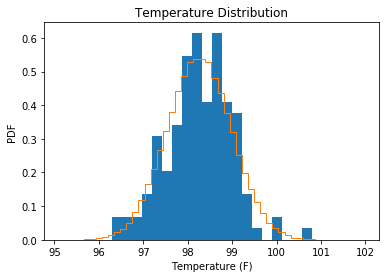

In [119]:
# Plot histogram  

_ = plt.hist(df["temperature"] ,normed=True, bins = 20)
_ = plt.ylabel("PDF")
_ = plt.xlabel("Temperature (F)")
_ = plt.title("Temperature Distribution")

temp_samp_mean = np.mean(df['temperature'])
temp_samp_std = np.std(df['temperature'])
t_sample = np.random.normal(temp_samp_mean,temp_samp_std,100000)
_ = plt.hist(t_sample, normed=True , bins=50 , histtype='step')

plt.show()

The plot shows that the temp distribution is very closed to Normal Dist, however we have to check it with normaltest too.

In [120]:
# Check the temp normal dist with normaltest 

result = stats.normaltest(df['temperature'])
print (result)


NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)


since p-value (0.25) > 0.05, we can not reject the null hypothesis and we have to say the dist is "Normal". 

### 2. Is the sample size large? Are the observations independent?

In [121]:
size = df["temperature"].count()
print (size)

130


For realizing whether a sample size is large enough or not, we have to consider the confidence level that is appropiate for us and its related Z score. 

Some special confidence level and their Z scores are: 

90% – Z Score = 1.645
95% – Z Score = 1.96
99% – Z Score = 2.576


So now we have to figure out with the current Standard Deviation, and different groups of confince interval and Z what would be Necessary Sample Size:  

Necessary Sample Size = (Z-score)2 * StdDev*(1-StdDev) / (margin of error)2

Now since we do not know the exact Standard Deviation of Population, we will use 0.5 since it will give us the maximum Necessary Sample Size. 

For 90% confidence level and 2.5% Margin of error, the necessary sample size is: 
(1.645^2) * (0.5^2) / (0.025^2) = 1082

For 95% confidence level and 5% Margin of error, the necessary sample size is: 
(1.96^2) * (0.5^2) / (0.05^2) = 384

For 95% confidence level and 10% Margin of error, the necessary sample size is: 
(1.96^2) * (0.5^2) / (0.1^2) = 96 

For 99% confidence level and 10% Margin of error, the necessary sample size is: 
(2.576^2) * (0.5^2) / (0.1^2) = 165 

So the sample size is relatively large enough (n>30) , and we can expect that our result with 95% confidence level has margin error less than 10% which can be acceptable. 

- Are the observations independent ? 

As far as we can tell based on the information that we have here, each observation is independent since we measured the gender, body temp, and heart beat of different people and not same people so we can tell observations are independent. However for giving more accurate answer to this question we may need more infomration of participants such as age, race and etc. 

### 3. Is the true population mean really 98.6 degrees F?

Since we have one data set and just population mean, we will use one-sample test. In this regard, the null hypothesis is: "true population mean is 98.6 F" and the alternative hypothesis is "true population mean is not 98.6 F". 
Also in order to choose between z-score and t-test, we have to consider z-score is better but we need population variance and enough sample size. Here we do not know the population variance, so we will begin with t-test. 


In [122]:
# one-sample t-test 

one_samp_t_score = stats.ttest_1samp(df['temperature'], 98.6)
print (one_samp_t_score)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)


T_score and P-Value are very small, so it shows that there is significant difference between sample mean and true body temperature mean (98.6 F), therefore the true population mean is **not** 98.6 F. 
In next step, I am using the other test (z-test) to figure out whether I would get the significant difference from this test or not. 

In [123]:
# z-test 

from statsmodels.stats.weightstats import ztest

z_score = ztest(df['temperature'],value=98.6)
print (z_score)
print ("The t-score value is %F with the P-value of: %6.9F" %(one_samp_t_score[0], one_samp_t_score[1]))
print ("The z-score value is %F with the P-value of: %6.9F" %(z_score[0], z_score[1]))

(-5.4548232923645195, 4.9021570141012155e-08)
The t-score value is -5.454823 with the P-value of: 0.000000241
The z-score value is -5.454823 with the P-value of: 0.000000049


The results of Z-test and t-test are not much different, both of them reject the null hypothesis and shows the same score, the only difference is in their p-value (however again both of them has a very very small p-values). So both test say that the real mean population is different from 98.6 F. 

### 4. Draw a small sample of size 10 from the data and repeat both tests.

In [124]:
# Define the random sampling function 

def bootstrap_samp(data , size=1): 
    new_sample = np.random.choice(data , size)
    return new_sample 

# Use the function to draw a small sample of size 10 

new_temp_samp = bootstrap_samp(df['temperature'], size=10)
print ("Small sample size:", new_temp_samp)

# t-test and z-test for new small sample size 

one_samp_t_test_newsamp = stats.ttest_1samp(new_temp_samp, 98.6)
z_score_newsamp = ztest(new_temp_samp, value=98.6)

print ("The t-score value for small sample is %F with the P-value of: %6.9F" %(one_samp_t_test_newsamp[0], one_samp_t_test_newsamp[1]))
print ("The z-score value for small sample is %F with the P-value of: %6.9F" %(z_score_newsamp[0], z_score_newsamp[1]))


Small sample size: [ 97.3  97.6  96.4  96.4  97.4  97.6  98.6  99.2  98.4  99. ]
The t-score value for small sample is -2.589065 with the P-value of: 0.029258307
The z-score value for small sample is -2.589065 with the P-value of: 0.009623690


Looking to the results of new small sample size t-test and z-test, we can tell that the p-value increased significantly so we can not reject the null hypothesis anymore and we should say the real population mean is 98.6 F. 
In the case of having small sample size (n <30 ), we should trust z-score more than t-score, although in this case the output does not have so much difference.  

### 5. At what temperature should we consider someone's temperature to be "abnormal"?

Defining something abnormal needs some knowledge and background in specific field (here health and biology), but as a rule of thumb, I assume that a body temperatue outside the range of 95% confidence interval would be abnormal. In this regard, I need to measure the cofidence interval and margin of error. Here it is the formula for confidence interval: 
u  ±  Z * (s/√n) 
Z score can be extracted from the confidence interval table. For 95% of confidence interval the Z-score is: 1.96. 


In [125]:
s = temp_samp_std
u = temp_samp_mean

confidence_interval_end = u + (1.96 * s)/np.sqrt(len(df['temperature']))
confidence_interval_beg = u - (1.96 * s)/np.sqrt(len(df['temperature']))
confidence_interval = (confidence_interval_beg, confidence_interval_end)

print (confidence_interval)

print (((df['temperature'] > confidence_interval_beg) & (df['temperature'] < confidence_interval_end)).sum())

(98.123679804428193, 98.374781734033363)
15


As you can there a lot of observations (115) would not be in the range of confidence interval (mostly because of the small standard deviation of our observations compared to the mean), this does not make sence. So I am just considering that 95% of our observations should be in Normal range, So:

In [126]:
# Use percentile to figure out normal range

normal_range = np.percentile(df['temperature'],[2.5,97.5])
print (normal_range)

[ 96.7225  99.4775]


So any body temperature outside the range of [96.7225 , 99.4775] can considered as be abnormal. 

### 6. Is there a significant difference between males and females in normal temperature? 

Since we are going to separate our original data set into two data sets and just compare the results of these two groups, we can use two-sample t_test. 

In [127]:
# Separating male and females 

male_df = df[df['gender']=='M']
female_df = df[df['gender']=='F']

# Male and female body temp mean

male_mean = np.mean(male_df['temperature'])
female_mean = np.mean(female_df['temperature'])
print (male_mean , female_mean)

98.1046153846154 98.39384615384613


In order to test whether there is a significant difference between males and females, I choose my null hypothesis as there is no significant difference between male and female body temperature as null hypothesis. 

In [128]:
t_test_fem_male = stats.ttest_ind(male_df['temperature'],female_df['temperature'])
print (t_test_fem_male)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)


The p_value is lower than 0.05, so we can say there is a significant difference between male and femeals body temperatures, and females have relatively higher body temperature. 

In this piece, I figured out that the real body temperatue is a little bit different from the 98.6 F. Also the normal  body temperature with 95% confidence interval is within [96.7 , 99.4]. 
In addition, males and females have different average body temperature. 